# Corregir aberraciones cromáticas usando HSV
## Se espera como input una detección previa de la aberración

Objetivo: Corrección de aberraciones cromáticas.

Idea principal: bajar la saturación de la imagen (en este notebook se bajara la saturación de la imagen pero la idea es contar con filtros previos, e.g. uso de máscaras), para solo bajar la saturación en las zonas previamente seleccionadas.

Fuentes:
* https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html
* https://scikit-image.org/docs/dev/user_guide/getting_started.html
* https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary
* https://stackoverflow.com/questions/2612361/convert-rgb-values-to-equivalent-hsv-values-using-python

Atajos:
* https://cheatography.com/jorgejuan007/cheat-sheets/jupyter-notebook-atajos-de-teclado/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb

In [2]:
import os
data_dir = '/Users/alvaro/Documents/_PythonUNIR/_PC/PC_Actividades/ACT_1/Imagenes_ACT1'
filename = os.path.join(data_dir, 'peine.png')
from skimage import io
peine = io.imread(filename)

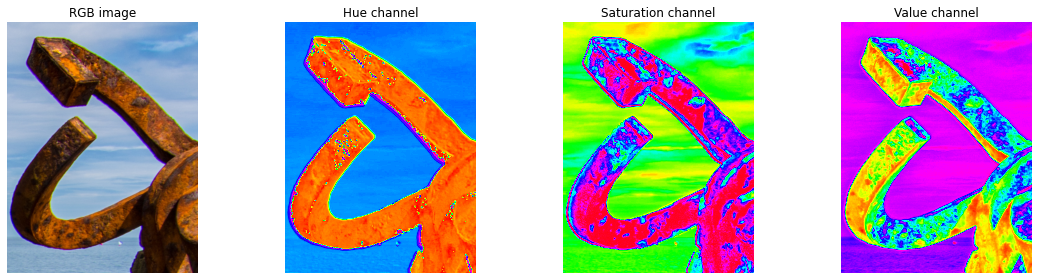

In [3]:
#Los valores de HSV van de 0 a 1
rgb_img = peine
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
sat_img = hsv_img[:, :, 1]
val_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(sat_img, cmap='hsv')
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(val_img, cmap='hsv')
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()

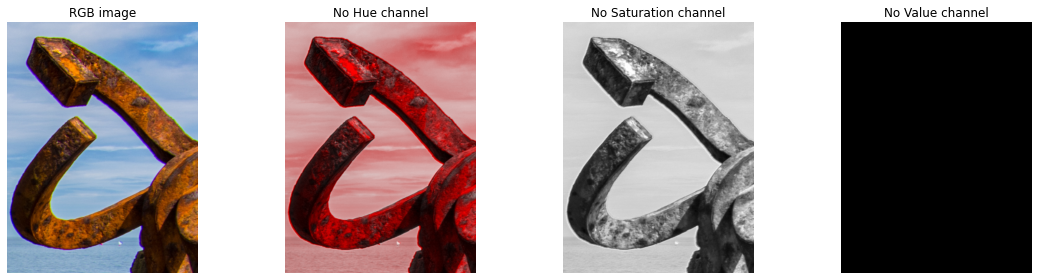

In [4]:
#Vamos a probar a bajar el Hue y ver el resultado de nuevo en RGB

layer_shape = hsv_img[:,:,0].shape
hsv_not_hue = hsv_img
hsv_not_hue[:,:,0] = np.zeros(layer_shape)
rgb_not_hue = hsv2rgb(hsv_not_hue)

hsv_not_sat = hsv_img
hsv_not_sat[:,:,1] = np.zeros(layer_shape)
rgb_not_sat = hsv2rgb(hsv_not_sat)

hsv_not_val = hsv_img
hsv_not_val[:,:,2] = np.zeros(layer_shape)
rgb_not_val = hsv2rgb(hsv_not_val)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(rgb_not_hue)
ax1.set_title("No Hue channel")
ax1.axis('off')
ax2.imshow(rgb_not_sat)
ax2.set_title("No Saturation channel")
ax2.axis('off')
ax3.imshow(rgb_not_val)
ax3.set_title("No Value channel")
ax3.axis('off')

fig.tight_layout()

# Lo que nosotros buscamos es bajarle la saturación
# En principio la idea es bajarale la saturación 0

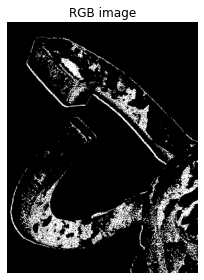

In [6]:
# Extra, voy a probar a detectar las zonas con una saturación mayor a un 90 por ciento
rgb_img = peine
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
sat_img = hsv_img[:, :, 1]
val_img = hsv_img[:, :, 2]


threshold = np.percentile(sat_img,90)
sat_mask = np.zeros(layer_shape)
x_shape = layer_shape[0]
y_shape = layer_shape[1]


for i in range(x_shape):
    for j in range(y_shape):
        if sat_img[i][j] >= threshold:
            sat_mask[i][j]=255

sat_mask

fig, (ax0) = plt.subplots(ncols=1, figsize=(16, 4))

ax0.imshow(sat_mask, cmap = 'gray')
ax0.set_title("RGB image")
ax0.axis('off')

fig.tight_layout()

# No se consigue una buena máscara

In [ ]:
# Máscara hecha por Sergio
# esperar ...

import cv2
#import numpy as np

img =cv2.imread("/Users/alvaro/Documents/_PythonUNIR/_PC/PC_Actividades/ACT_1/Imagenes_ACT1/peine.png")
hsv_img_mask = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_green = np.array([34,177,76])

upper_green = np.array([255,255,255])

masking = cv2.inRange(hsv_img_mask, lower_green, upper_green)

cv2.imshow("Green Color detection", masking)

cv2.waitKey(0)



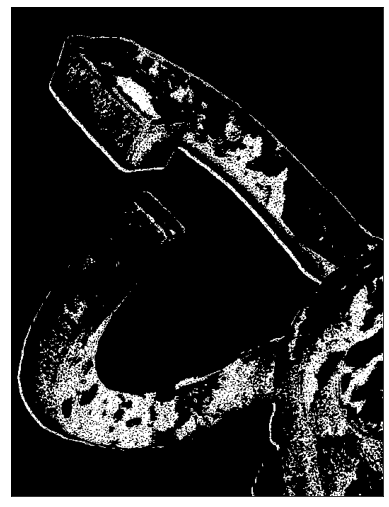

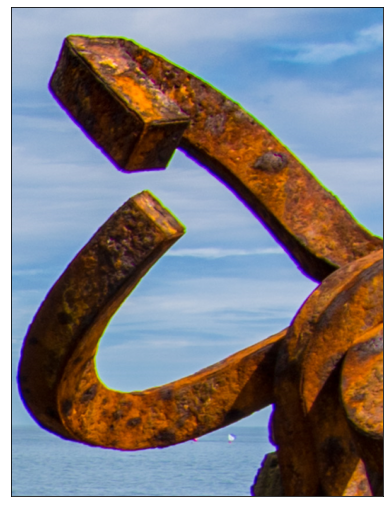

In [86]:
# Función sacada de LM 3 para mostrar resultados

def imshow(img):
    fig, ax = plt.subplots(figsize=(9, 9))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()
    
imshow(sat_mask)
imshow(rgb_img)